In [5]:
#
#
# CARREGANDO BASE DE DADOS DO SPOTIFY
# 
#

import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
plt.rcParams['figure.figsize'] = [16, 10]
import random

#definindo semente para geracao de numeros aleatorios
random.seed(10)

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
#https://archive.ics.uci.edu/ml/datasets/Ionosphere
dataset = pandas.read_csv("spotify_tracking_dataset.csv")

#print("Primeiros dados")
#print(dataset.head(5))

#divisao de dados atributos e classe
#X = dataset.values[:, 0:-1] #caracteristicas
#Y = dataset.values[:, -1] #classe
dataset.drop(index=int((len(dataset))/1000))#diminui 1000 vezes os dados
dataset.dropna(axis=0)#remove dados NaN
dataset.head()
Y = dataset['track_genre']
X = dataset.drop(columns=['track_id','artists','album_name','track_name','explicit','track_genre'])
#Y = pandas.get_dummies(Y_,dtype=float)
#Y = pandas.get_dummies(Y,dtype=float)
#type_dummies = Y.get_dummies(Y['track_genre'],drop_first=True)  
#Y = Y.concat([Y,type_dummies],axis=1)

#usando o metodo para criar os conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)
dataset.head()
#X.head()
#Y.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**KNN algoritm**

In [6]:
"""
Este código carrega o dataset, divide os dados em conjuntos de treinamento e teste, treina um modelo KNN nos dados de treinamento, faz previsões nos dados de teste e, finalmente, avalia o desempenho do modelo calculando a acurácia das previsões. O parâmetro n_neighbors no KNeighborsClassifier é o valor de K no algoritmo KNN, que é o número de vizinhos mais próximos a considerar ao fazer previsões. Neste exemplo, escolhemos n_neighbors=3, mas você pode ajustar esse valor para ver como ele afeta o desempenho do seu modelo.
"""
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo KNN
modelo = KNeighborsClassifier(n_neighbors=3)

# Treinar o modelo usando os dados de treinamento
modelo.fit(X_train, y_train)

# Fazer previsões usando os dados de teste
previsoes = modelo.predict(X_test)

# Avaliar o desempenho do modelo
acuracia = accuracy_score(y_test, previsoes)
print(f'Acurácia do modelo: {acuracia}')

Acurácia do modelo: 0.7825263157894737


Acurácia: 0.76


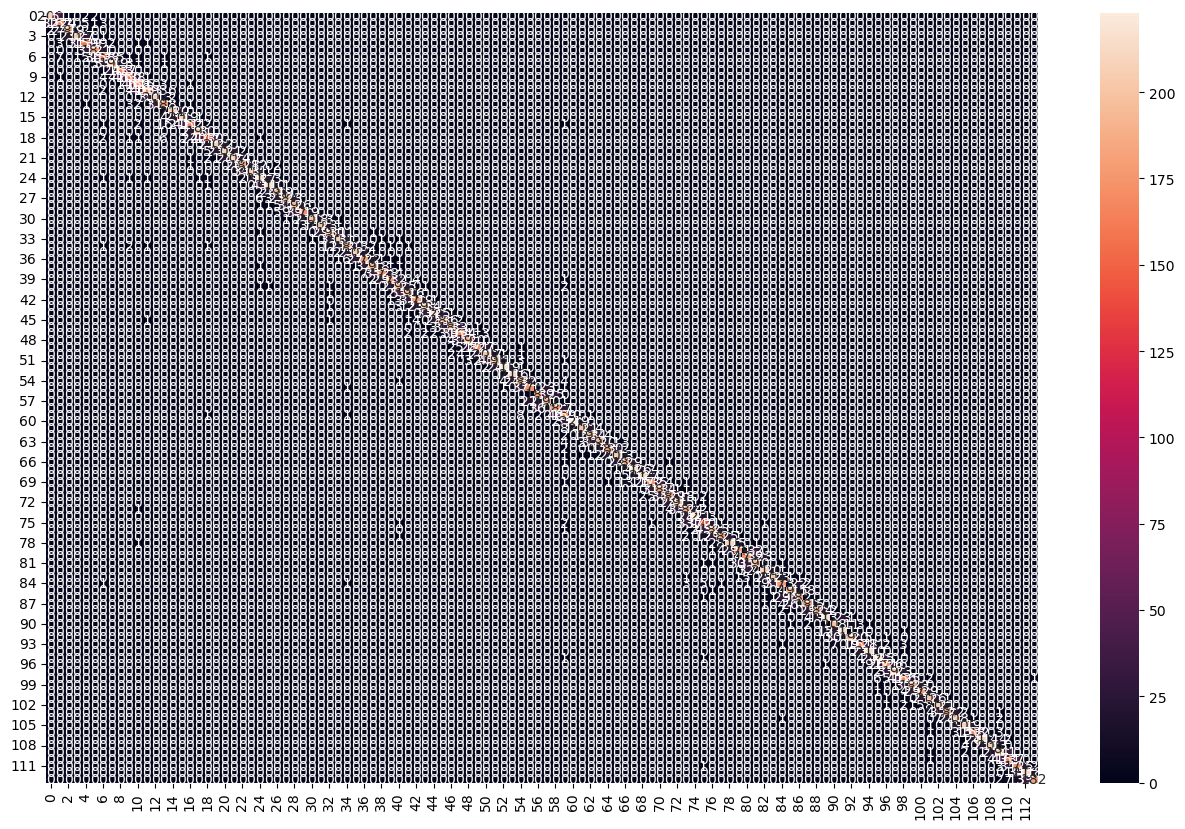

                   precision    recall  f1-score   support

         acoustic       0.86      0.79      0.82       265
         afrobeat       0.66      0.72      0.69       232
         alt-rock       0.79      0.80      0.79       231
      alternative       0.79      0.79      0.79       252
          ambient       0.69      0.65      0.67       245
            anime       0.69      0.77      0.73       234
      black-metal       0.66      0.63      0.65       249
        bluegrass       0.76      0.76      0.76       258
            blues       0.70      0.72      0.71       225
           brazil       0.62      0.63      0.62       254
        breakbeat       0.66      0.71      0.68       235
          british       0.77      0.66      0.71       257
         cantopop       0.76      0.82      0.79       252
    chicago-house       0.77      0.80      0.78       227
         children       0.84      0.89      0.86       238
            chill       0.77      0.82      0.79       

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Criar uma instância da classe KNeighborsClassifier e ajustar o modelo usando os conjuntos de treinamento
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prever os resultados do conjunto de teste
Yhat = knn.predict(X_test)

# Calcular a acurácia
print('Acurácia: {:.2f}'.format(knn.score(X_test, y_test)))

# Matriz de confusão
cm = confusion_matrix(y_test, Yhat)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

# Relatório de classificação
print(classification_report(y_test, Yhat))

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calcular a precisão
precision = precision_score(y_test, previsoes, average='weighted')
print(f'Precisão: {precision}')

# Calcular o recall
recall = recall_score(y_test, previsoes, average='weighted')
print(f'Recall: {recall}')

# Calcular a pontuação F1
f1 = f1_score(y_test, previsoes, average='weighted')
print(f'Pontuação F1: {f1}')

# Calcular a área sob a curva ROC
# Como o KNN não fornece probabilidades diretamente, não podemos calcular a área sob a curva ROC diretamente.

Precisão: 0.7833885266049935
Recall: 0.7825263157894737
Pontuação F1: 0.7824306079455924


**SVM algoritm**

Acurácia do modelo SVM: 0.7585263157894737


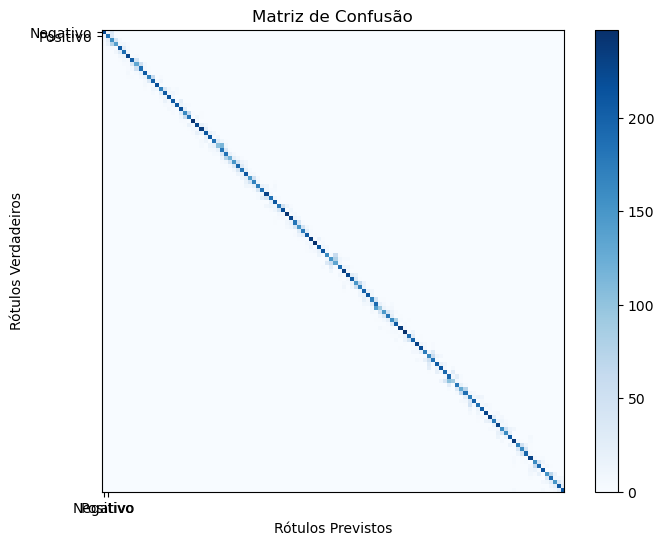

                   precision    recall  f1-score   support

         acoustic       0.91      0.83      0.87       265
         afrobeat       0.77      0.79      0.78       232
         alt-rock       0.51      0.67      0.58       231
      alternative       0.72      0.55      0.62       252
          ambient       0.80      0.84      0.82       245
            anime       0.78      0.80      0.79       234
      black-metal       0.89      0.90      0.90       249
        bluegrass       0.83      0.78      0.81       258
            blues       0.56      0.58      0.57       225
           brazil       0.72      0.74      0.73       254
        breakbeat       0.84      0.88      0.86       235
          british       0.81      0.67      0.73       257
         cantopop       0.73      0.80      0.76       252
    chicago-house       0.94      0.96      0.95       227
         children       0.79      0.71      0.75       238
            chill       0.76      0.81      0.78       

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Normalizando os dados
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

# Criando o classificador SVM
svm_classifier = SVC(kernel='linear')

# Treinando o classificador SVM
svm_classifier.fit(X_train2, y_train)

# Fazendo previsões
Yhat = svm_classifier.predict(X_test2)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, Yhat)
print("Acurácia do modelo SVM:", accuracy)

# Plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, Yhat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.show()

# Calcular o relatório de classificação
print(classification_report(y_test, Yhat))

# Calcular a precisão
precision = precision_score(y_test, Yhat, average='weighted')
print(f'Precisão: {precision}')

# Calcular o recall
recall = recall_score(y_test, Yhat, average='weighted')
print(f'Recall: {recall}')

# Calcular a pontuação F1
f1 = f1_score(y_test, Yhat, average='weighted')
print(f'Pontuação F1: {f1}')

In [14]:
"""
A curva ROC e a função roc_curve só são adequadas para problemas de classificação binária,
enquanto esse problema é multiclasse.
Quando estamos lidando com problemas multiclasse, precisamos usar outras abordagens para avaliação do modelo,
pois a curva ROC e a área sob a curva ROC não são diretamente aplicáveis.
"""

'\nA curva ROC e a função roc_curve só são adequadas para problemas de classificação binária,\nenquanto esse problema é multiclasse.\nQuando estamos lidando com problemas multiclasse, precisamos usar outras abordagens para avaliação do modelo,\npois a curva ROC e a área sob a curva ROC não são diretamente aplicáveis.\n'

**Decision Tree algorithm**

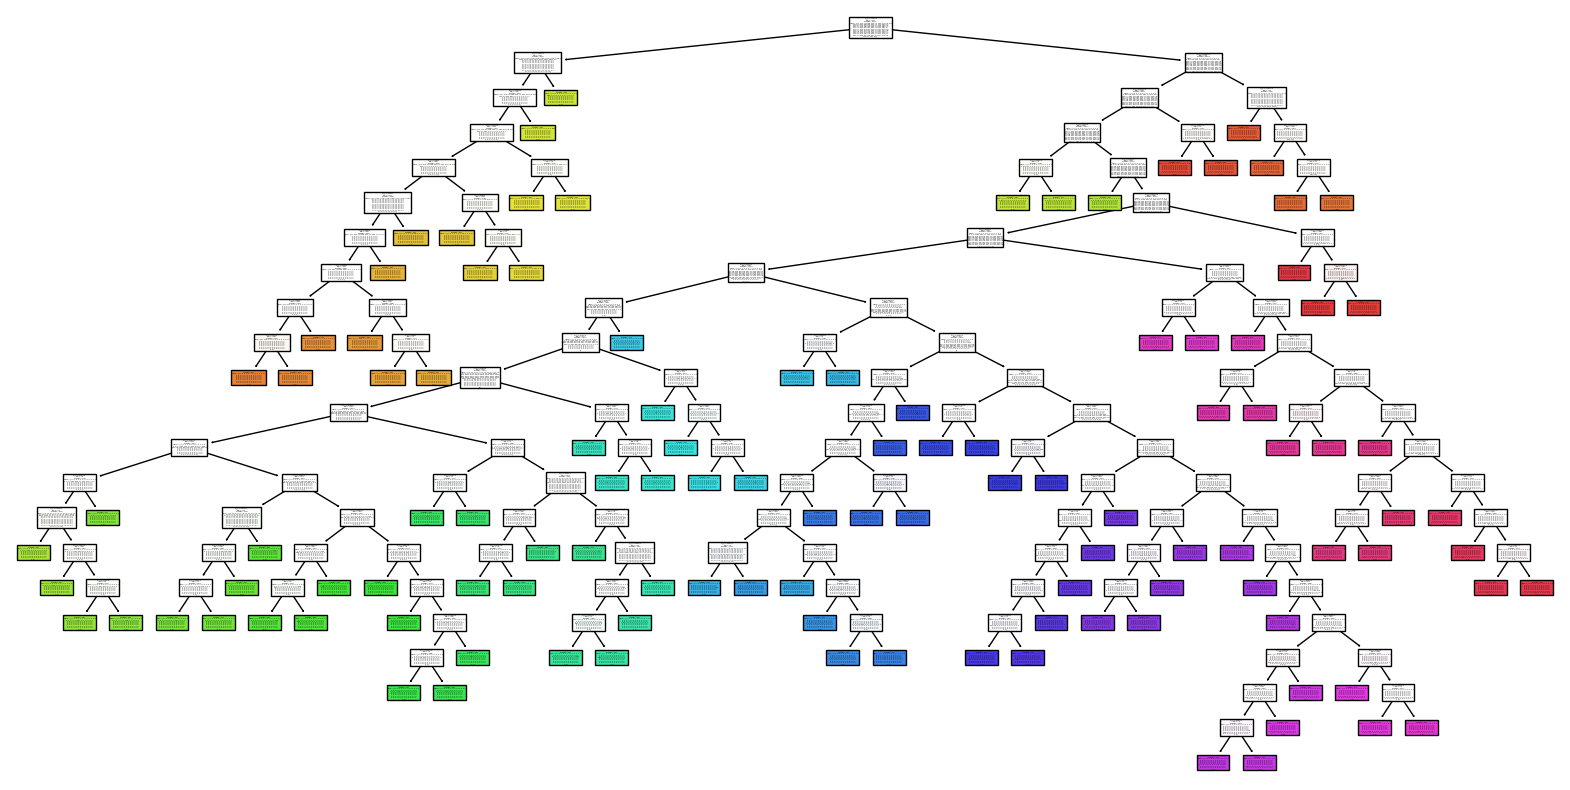

Acurácia do modelo de Árvore de Decisão: 0.9986315789473684


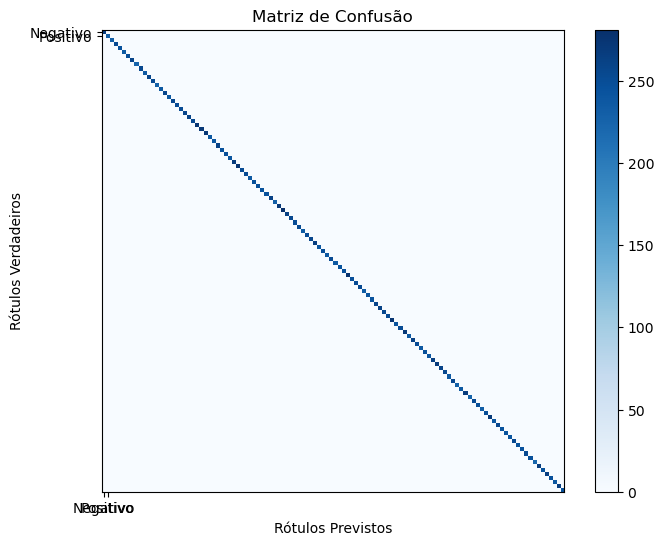

                   precision    recall  f1-score   support

         acoustic       1.00      1.00      1.00       265
         afrobeat       1.00      1.00      1.00       232
         alt-rock       1.00      1.00      1.00       231
      alternative       1.00      1.00      1.00       252
          ambient       1.00      1.00      1.00       245
            anime       1.00      1.00      1.00       234
      black-metal       1.00      1.00      1.00       249
        bluegrass       1.00      1.00      1.00       258
            blues       1.00      1.00      1.00       225
           brazil       1.00      1.00      1.00       254
        breakbeat       1.00      1.00      1.00       235
          british       1.00      1.00      1.00       257
         cantopop       1.00      1.00      1.00       252
    chicago-house       1.00      1.00      1.00       227
         children       1.00      1.00      1.00       238
            chill       1.00      1.00      1.00       

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Criando o classificador de Árvore de Decisão
dt_classifier = DecisionTreeClassifier(random_state=42)

# Treinando o classificador
dt_classifier.fit(X_train, y_train)

# Fazendo previsões
Yhat = dt_classifier.predict(X_test)

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))
#plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Negativo', 'Positivo'])
plot_tree(dt_classifier, filled=True)
plt.show()

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, Yhat)
print("Acurácia do modelo de Árvore de Decisão:", accuracy)

# Plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, Yhat)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.show()

# Calcular o relatório de classificação
print(classification_report(y_test, Yhat))

# Calcular a precisão
precision = precision_score(y_test, Yhat, average='weighted')
print(f'Precisão: {precision}')

# Calcular o recall
recall = recall_score(y_test, Yhat, average='weighted')
print(f'Recall: {recall}')

# Calcular a pontuação F1
f1 = f1_score(y_test, Yhat, average='weighted')
print(f'Pontuação F1: {f1}')

# Calcular a curva ROC
# A árvore de decisão não fornece diretamente as probabilidades de classe necessárias para calcular a curva ROC e a área sob a curva ROC.

# Como alternativa, podemos utilizar a função `predict_proba` se o classificador a suportar, porém, a DecisionTreeClassifier não a suporta.
